In [28]:
#Taken from textbook solutions
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


In [29]:
"""
    Question 1:
        The fundamental idea behind SVM's is to seperate data into two classes while focusing on creating as much "space" between the classes
        This is done to prevent instances from being between the two classes, allowing the machine to make confident decisions.
        
    Question 2:
        Support vectors are those instances between classes of a SVM. Decision boundaries are produced using support vectors and this means
        predictions are made based off of these instances alone.
        
    Question 3:
        SVM's work best on scaled data, or even requires scaled data. This is because SVM's can miss small features, because they will be overshadowed
        by the larger ones.
    
    Question 4:
        Since SVM's use decision boundaries to make predictions, the distance of one instance to the nearest decision boundary can be used to determine
        confidence. The nearer to a boundary an instance is, the less confident the prediction. This distance, however, does not directly relate to probability.
        
    Question 5:
        Primal SVM's have complexities proportional to the number of instances in the training set. On the other hand, the dual form would have a complexity 
        proportional to the number of instances cubed. In fact, the complexity could only go as low as the number of instances squared. For such a large
        training set, one million instances, you should really use a primal SVM.
        
    Question 6:
        Underfitting is typical when Overregularization occurs. To correct this, gamma and C could be increased.
        
    Question 7:
        The parameters should be based off of the hard margin problem. H would instead be a matrix with the hard constrain value for H at the leftmost and upmost 
        position with rows of zeroes and columns of zeroes on the side and below. There should be rows of zeroes and m columns, where m is the number of added 
        parameters needed to configure the soft margin. f would be the same as the hard margin f, but with m more elements, all equal to C. b is a similar case to
        f, having m more elements, those equalling 0. A would now be a matrix with the previous A at the top left, an identity matrix of size m and its negative 
        would fill the right column. The bottom left entry of A would be a zero.
        
"""
"Hands-On Exercises: "

'Hands-On Exercises: '

In [30]:
#   Question 8: 
    #   Train a LinearSVC on a linearly separable dataset. Then train an SVC and a 
    #   SGDClassifier on the same dataset. See if you can get them to produce roughly
    #   the same model.
    #The solution set uses the Iris database, so I will try to as well
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [31]:
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler



a = 1 / (4 * len(X))

linearClassifier = LinearSVC(loss="hinge", C=4) #my linear classifier
svmClassifier = SVC(kernel="linear", C=4) #my SVC classifier
sgdClassifier = SGDClassifier(loss="hinge", learning_rate="constant", eta0=0.001, alpha=(1 / (5 * len(X))),
                        max_iter=1000, tol=1e-3)#my SGD classifier

scaler = StandardScaler()
XstdScale = scaler.fit_transform(X) #Scaled data is preffered for SGD, so to use the 'same dataset' lets use it for all

linearClassifier.fit(XstdScale, y)
svmClassifier.fit(XstdScale, y)
sgdClassifier.fit(XstdScale, y)

#Making output pretty is not super neccessary, so I grabbed this from the solutions and put in my var names

print("LinearSVC:                   ", linearClassifier.intercept_, linearClassifier.coef_)
print("SVC:                         ", svmClassifier.intercept_, svmClassifier.coef_)
print("SGDClassifier(alpha={:.5f}):".format(sgdClassifier.alpha), sgdClassifier.intercept_, sgdClassifier.coef_)


LinearSVC:                    [0.28475098] [[1.05364854 1.09903804]]
SVC:                          [0.31896852] [[1.1203284  1.02625193]]
SGDClassifier(alpha=0.00200): [0.118] [[0.77647131 0.73001593]]


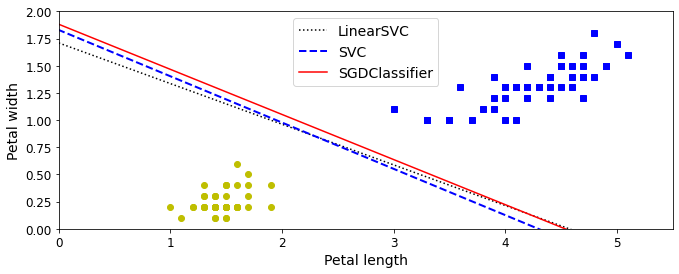

In [32]:
# Compute the slope and bias of each decision boundary
w1 = -linearClassifier.coef_[0, 0]/linearClassifier.coef_[0, 1]
b1 = -linearClassifier.intercept_[0]/linearClassifier.coef_[0, 1]
w2 = -svmClassifier.coef_[0, 0]/svmClassifier.coef_[0, 1]
b2 = -svmClassifier.intercept_[0]/svmClassifier.coef_[0, 1]
w3 = -sgdClassifier.coef_[0, 0]/sgdClassifier.coef_[0, 1]
b3 = -sgdClassifier.intercept_[0]/sgdClassifier.coef_[0, 1]

# Transform the decision boundary lines back to the original scale
line1 = scaler.inverse_transform([[-10, -10 * w1 + b1], [10, 10 * w1 + b1]])
line2 = scaler.inverse_transform([[-10, -10 * w2 + b2], [10, 10 * w2 + b2]])
line3 = scaler.inverse_transform([[-10, -10 * w3 + b3], [10, 10 * w3 + b3]])

# Plot all three decision boundaries
plt.figure(figsize=(11, 4))
plt.plot(line1[:, 0], line1[:, 1], "k:", label="LinearSVC")
plt.plot(line2[:, 0], line2[:, 1], "b--", linewidth=2, label="SVC")
plt.plot(line3[:, 0], line3[:, 1], "r-", label="SGDClassifier")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # label="Iris versicolor"
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # label="Iris setosa"
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper center", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

In [33]:
#   Question 9: 
    #   Train an SVM classifier on the MNIST dataset. Since SVM classifiers are binary 
    #   classifiers, you will need to use one-versus-the-rest to classify all 10 digits. 
    #   You may want to tune the hyperparameters using small validation sets to speed up 
    #   the process. What accuracy can you reach?
#Importing to fetch MNIST    
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, cache=True)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

Xtraining = X[:60000]
ytraining = y[:60000]
Xtest = X[60000:]
ytest = y[60000:]

In [34]:
#after trying some standard SVC options, I referenced the solution where it shows scaling improving results
scaler = StandardScaler()
XtrainingStdScaled = scaler.fit_transform(Xtraining.astype(np.float32))
XtestStdScaled = scaler.transform(Xtest.astype(np.float32))

In [35]:
svcClassifier = SVC(gamma="scale")
svcClassifier.fit(XtrainingStdScaled[:10000], ytraining[:10000])

SVC()

In [36]:
from sklearn.metrics import accuracy_score
scaledPredictions = svcClassifier.predict(XtrainingStdScaled)
accuracy_score(ytraining, scaledPredictions)

0.9455333333333333

In [37]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

randomSearchParameters = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)} 
randomSearchCV = RandomizedSearchCV(svcClassifier, randomSearchParameters, n_iter=10, verbose=2, cv=3)
randomSearchCV.fit(XtrainingStdScaled[:1000], ytraining[:1000])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=8.796910002727692, gamma=0.015620693675639861 .................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .. C=8.796910002727692, gamma=0.015620693675639861, total=   0.9s
[CV] C=8.796910002727692, gamma=0.015620693675639861 .................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] .. C=8.796910002727692, gamma=0.015620693675639861, total=   0.9s
[CV] C=8.796910002727692, gamma=0.015620693675639861 .................
[CV] .. C=8.796910002727692, gamma=0.015620693675639861, total=   0.9s
[CV] C=5.458327528535912, gamma=0.0015847101210439089 ................
[CV] . C=5.458327528535912, gamma=0.0015847101210439089, total=   0.7s
[CV] C=5.458327528535912, gamma=0.0015847101210439089 ................
[CV] . C=5.458327528535912, gamma=0.0015847101210439089, total=   0.7s
[CV] C=5.458327528535912, gamma=0.0015847101210439089 ................
[CV] . C=5.458327528535912, gamma=0.0015847101210439089, total=   0.7s
[CV] C=5.592488919658671, gamma=0.004649617447336332 .................
[CV] .. C=5.592488919658671, gamma=0.004649617447336332, total=   0.8s
[CV] C=5.592488919658671, gamma=0.004649617447336332 .................
[CV] .. C=5.592488919658671, gamma=0.004649617447336332, total=   0.8s
[CV] C=5.592488919658671, gamma=0.004649617447336332 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   22.5s finished


RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa384d51ac0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa384db4fa0>},
                   verbose=2)

In [38]:
#Results
randomSearchCV.best_estimator_

SVC(C=4.998609717152554, gamma=0.001239742034078414)

In [39]:
randomSearchCV.best_score_

0.8639927352502204

In [40]:
randomSearchCV.best_estimator_.fit(XtrainingStdScaled, ytraining)

SVC(C=4.998609717152554, gamma=0.001239742034078414)

In [41]:
predictions = randomSearchCV.best_estimator_.predict(XtrainingStdScaled)

In [42]:
accuracy_score(ytraining, predictions)

0.997

In [43]:
predictions = randomSearchCV.best_estimator_.predict(XtestStdScaled)
accuracy_score(ytest, predictions)

0.9728

In [44]:
#   Question 10:
    #   Train an SVM regressor on the California housing dataset.

In [45]:
#Fetching housing data
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]

In [46]:
#Use scikit to split 1/4 of the data
from sklearn.model_selection import train_test_split

Xtraining, Xtest, ytraining, ytest = train_test_split(X, y, test_size=0.25)

In [47]:
# Scaling data as some values, like the estimated values will be well over the $100,000 range
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
XtrainingScaled = scaler.fit_transform(Xtraining)
XtestScaled = scaler.transform(Xtest)

In [48]:
#Linear SVR
from sklearn.svm import LinearSVR

linearSVR = LinearSVR()
linearSVR.fit(XtrainingScaled, ytraining)

/Users/hunterroy/opt/anaconda3/envs/jupyterlab/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVR()

In [49]:
from sklearn.metrics import mean_squared_error

predictions = linearSVR.predict(XtrainingScaled)
mse = mean_squared_error(ytraining, predictions)

In [50]:
np.sqrt(mse)

0.9555572499047832

In [51]:
# SVR and 
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal, uniform

param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
randSearch = RandomizedSearchCV(SVR(), param_distributions, n_iter=10, verbose=2, cv=3)
randSearch.fit(XtrainingScaled, ytraining)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] C=1.0958601774146761, gamma=0.0010818997993297015 ...............
[CV]  C=1.0958601774146761, gamma=0.0010818997993297015, total=   3.8s
[CV] C=1.0958601774146761, gamma=0.0010818997993297015 ...............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.8s remaining:    0.0s


[CV]  C=1.0958601774146761, gamma=0.0010818997993297015, total=   3.8s
[CV] C=1.0958601774146761, gamma=0.0010818997993297015 ...............
[CV]  C=1.0958601774146761, gamma=0.0010818997993297015, total=   3.3s
[CV] C=5.075429379342161, gamma=0.002858611840238359 .................
[CV] .. C=5.075429379342161, gamma=0.002858611840238359, total=   3.3s
[CV] C=5.075429379342161, gamma=0.002858611840238359 .................
[CV] .. C=5.075429379342161, gamma=0.002858611840238359, total=   3.3s
[CV] C=5.075429379342161, gamma=0.002858611840238359 .................
[CV] .. C=5.075429379342161, gamma=0.002858611840238359, total=   3.3s
[CV] C=2.573377058000477, gamma=0.017007952380865003 .................
[CV] .. C=2.573377058000477, gamma=0.017007952380865003, total=   3.3s
[CV] C=2.573377058000477, gamma=0.017007952380865003 .................
[CV] .. C=2.573377058000477, gamma=0.017007952380865003, total=   3.4s
[CV] C=2.573377058000477, gamma=0.017007952380865003 .................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.7min finished


RandomizedSearchCV(cv=3, estimator=SVR(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa384cd8c10>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa384b66b20>},
                   verbose=2)

In [52]:
randSearch.best_estimator_

SVR(C=3.6425987784965566, gamma=0.04674460676495714)

In [53]:
predictions = randSearch.best_estimator_.predict(XtrainingScaled)
mse = mean_squared_error(ytraining, predictions)
np.sqrt(mse)

0.60432633628129

In [55]:
predictions = randSearch.best_estimator_.predict(XtestScaled)
mse = mean_squared_error(ytest, predictions)
np.sqrt(mse)

0.6018663123054411